# <center>Project: Encrypted Email in Python</center>

## Project Description

Considering email has been widely used recently, and people's awareness of protecting personal information has raised, I integrate the fundamental email functionalities into the encryption code based on Python in this project. 

This project comprises two primary portions: the basic email functionalities implemented in Python, including sending emails to multiple receivers and receiving an optional number of emails from the user's email; the other is encoding and decoding the subject and content of an email.

The rest notebook consists of six sections: (1) **Directory** shows the hierarchy of the project zip file. (2) **Instruction** expounds on how to use this project to send or receive emails with encryption. (3) **Basis Theories** narrate the techniques of email sending and receiving. (4) **Algorithm** illustrates the encoding and decoding algorithms used in this project. (5) **Challenges** demonstrate all the challenges I have met during the process. (6) **Future Work** demonstrates the future improvement and work of this project. Besides, there is also an **Extra Credit** section at the end of the note, reflecting the significant sparkling points in this project.

## Directory

This project is based on Python 3.8 (32-bit). The IDE is Visual Studio 2019 16.11.3 version. Moreover, in the zip file I submitted, there are three folders, two particular files of VS 2019, and this Jupyter notebook file, as shown in the below figure.

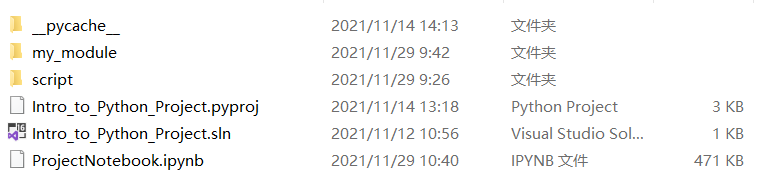

Except for other configuration folders and files, I will explain what the `my_module` and `script` folders exactly contain here, which are more related to our project task.

In the `my_module` folder, `.pytest_cache` is generated by running the pytest in the command line. `__pycache__` contains four `.pyc` files of the four specific `.py` files in the folder. For the four `.py` files, `classes.py` includes the Class MyEmail, `functions.py` includes five functions, `test_classes.py` is the test file for Class, and `test_functions.py` is the test file for three functions.

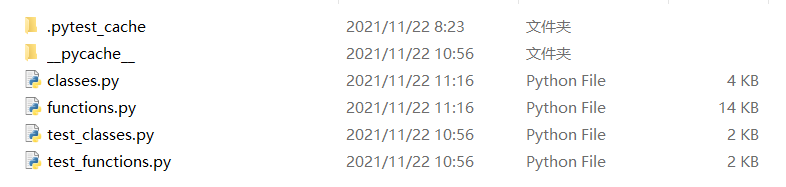

In the `script` folder, there is the main function, `Intro_to_Python_Project.py`, in which I call the other functions to achieve our goal in this project.

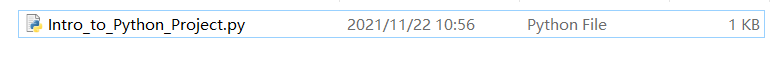

## Instruction

Run the script python file, and it will show us the welcome sentence and menu, as shown in the following figure. We can choose (input the specific `number` or `Quit` in the window): `[1]Send an email`, `[2]Receive email(s)`, and `[3]Quit`. I am going to describe each of them explicitly.

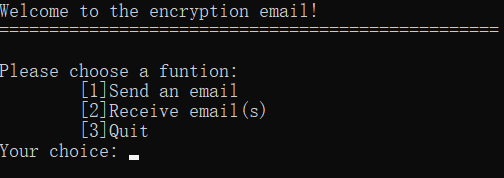

**1. If we choose `[1]Send an email`**, it prompts us to enter the username, i.e., the user's email. I wrote conditionals here to determine three different conditions. Moreover, each condition corresponds to a distinct response: 
 * *Not a correct email format or None*
 * *Is a Gmail email, but not the valid user*
 * *The valid user*
 
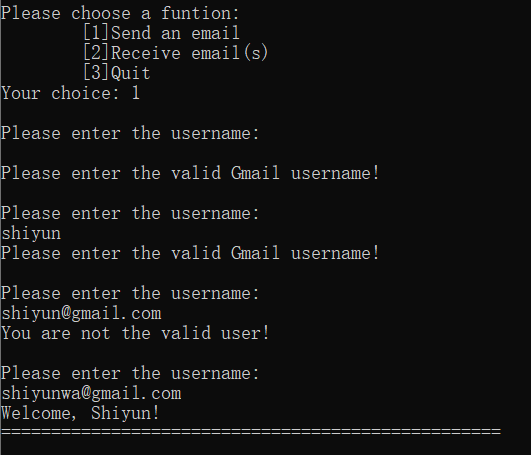

   Afterward, we can continue entering the receivers' emails that we intend to send an email. Enter `Quit` to escape the input. There are also conditionals to check the input.
   
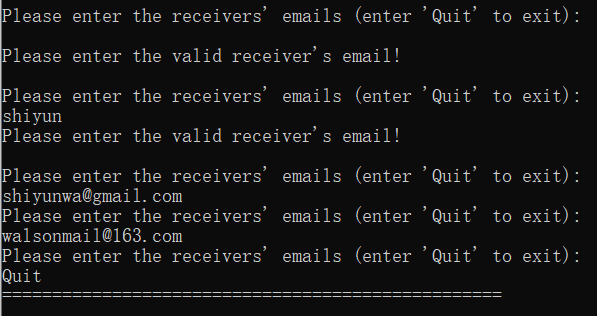

   Subsequently, write the email's subject and content. After writing each section, it will prompt that "encode or not" — input `yes` or `no` to determine. The offset number of each character of subject and content should be set in the `functions.send_email(offset_num)` in the main script function.
   
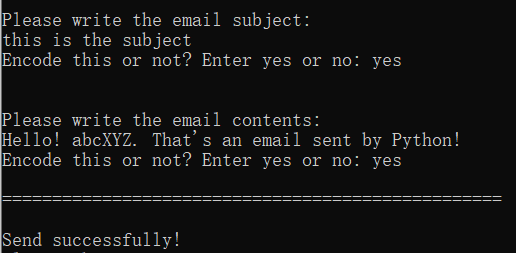

   Since I preset the `functions.send_email(2)` in the main script function, each email character I received should be added two Unicode code points. For letters, they should shift two sites in terms of the Ceasar cipher algorithm. Below is the email I received in my Gmail and 163 Net Mail Master.
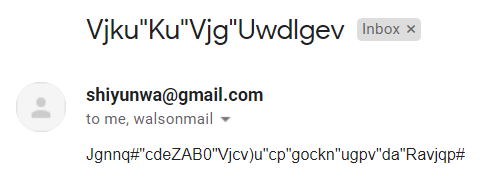
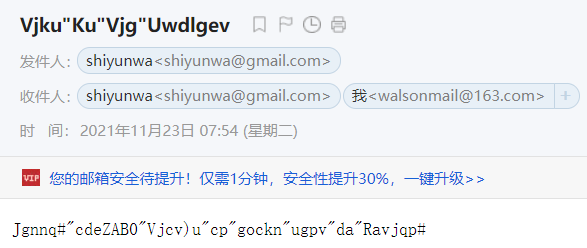

**2. If we choose `[2]Receive email(s)`**, similarly, it will prompt us to enter the username. Then we have to choose "decode or not" — input `yes` or `no` to determine. Now, please pay attention! We can choose the number of emails that we want to receive in the `functions.receive_email(try_num, receive_num = 1)` in the main script function. Because we are receiving emails and we are not sure how many offset numbers they have been encoded (shifted). I combined the `try_num` with the `offset_num` in the `receive_email` function by using a for loop to try `try_num` times to decode.

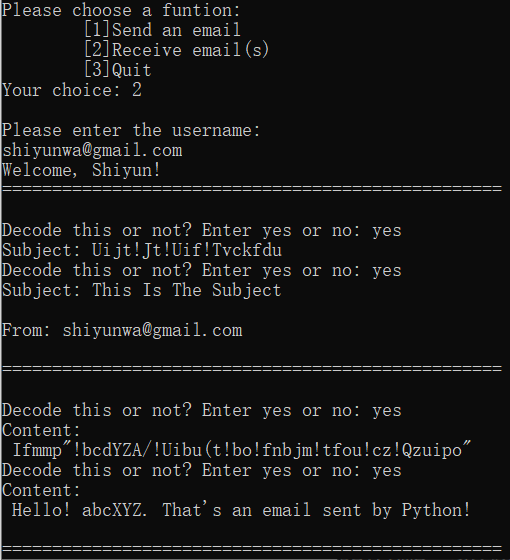

**3. If we choose `[3]Quit`**, then we can terminate the main function.

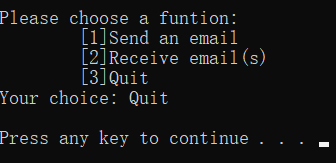

## Basis Theories

### 1. SMTP

In this project, I use Gmail's SMTP to send an email. SMTP (Simple Mail Transfer Protocol) is a set of rules for sending mail from the source address to the destination address, which controls how the mail is forwarded. Different email servers have their distinct SMTP. In addition, we import the build-in library, `smtplib`, to achieve our goal.

Specifically, the steps are as follows <sup>[1]</sup>:
  - Log in
    * Connect the server `smtp.gmail.com`
    * Log in to Gmail using username (email address) and password (application password).
  - Prepare data
    * Import `email` library.
    * Create an email object.
    * Add subject, sender's email, and receivers' emails.
    * Add email content, set text and encode version.
  - Send email
    * Call server's `sendmail` method to send an email.

There are two ways to start a secure connection with the email server <sup>[2]</sup>:
  - Start an SMTP connection that is secured from the beginning using SMTP_SSL().
  - Start an unsecured SMTP connection that can then be encrypted using .starttls() *(used in this project)*.

Additionally, Gmail requires that we connect to port 465 if using SMTP_SSL(), and to port 587 when using .starttls().

In [ ]:
# Main code chunks of the function send_email()

# Write subject
print('Please write the email subject: ')
email_obj.mail_subject = input()
email_obj.mail_subject = email_obj.mail_subject.title()
encoded_subject = encode_email(email_obj.mail_subject, offset_num, direction)
print()

# Write content
print('Please write the email contents: ')
email_obj.mail_content = input()
encoded_content = encode_email(email_obj.mail_content, offset_num, direction)
split_boundary()

# Assign email information
message = MIMEText(encoded_content, 'plain', 'utf-8')
message['Subject'] = encoded_subject
message['From'] = user_name
message['To'] = ','.join(email_obj.receivers)

# Use SMTP to send an email
try:
    smtp_obj = smtplib.SMTP(email_obj.send_server, email_obj.port)
    smtp_obj.ehlo()
    smtp_obj.starttls()
    smtp_obj.login(email_obj.user_name, email_obj.app_password)
    smtp_obj.sendmail(user_name, email_obj.receivers, message.as_string())
    smtp_obj.quit()
    print('Send successfully!')
except:
    print('Assert error! Please check the server setting...')

Please write the email subject: 


### 2. IMAP

  I use Gmail's IMAP technique to receive emails in Python by importing the built-in imaplib module. Unlike the POP3 protocol which downloads emails and deletes them from the server (and then reads them offline), with IMAP, the message does not remain on the local computer, it stays on the server <sup>[3]</sup>.
  
  The steps are as follows:
  * Connect to the IMAP server `imap.gmail.com` by using username and password.
  * Select the email box name and receive numbers.
  * Get the subject, sender name, and content, separately.

In [ ]:
# Main code chunks of the function receive_email()

# Create an IMAP4 class with SSL and login
imap_obj = imaplib.IMAP4_SSL(email_obj.receive_server)
imap_obj.login(email_obj.user_name, email_obj.app_password)

# Get information from the Index box
status, messages = imap_obj.select('INBOX')
messages = int(messages[0])

for i in range(messages, messages - receive_num, -1):
    # Fetch the email message by ID
    res, msg = imap_obj.fetch(str(i), '(RFC822)')
    
    for response in msg:
        if isinstance(response, tuple):
            # Parse a bytes email into a message object
            msg = email.message_from_bytes(response[1])

            # Decode the email subject
            subject, encoding_1 = decode_header(msg['Subject'])[0]
            # Decode email sender
            from_sender, encoding_2 = decode_header(msg.get('From'))[0]

            # If subject is a bytes, decode to str
            if isinstance(subject, bytes):              
                subject = subject.decode(encoding_1)
                # From 1 to try_num, try try_num times to decode
                # each time, the offset_num equals the actual try_num value
                # in the interval [1, try_num]
                for offset_num in range(1, try_num + 1):
                    decoded_subject = decode_email(subject, offset_num)
                    print('Subject:', decoded_subject)
                print()

            # If from_sender is a bytes, decode to str
            elif isinstance(from_sender, bytes):
                from_sender = from_sender.decode(encoding_2)
                print('From:', from_sender)
                print()

            # Else, the email is a plain text version
            else:
                for offset_num in range(1, try_num + 1):
                    decoded_subject = decode_email(subject, offset_num)
                    print('Subject:', decoded_subject)
                print()
                print('From:', from_sender)
                print()

            split_boundary()

            # If the email message is multipart
            if msg.is_multipart():
                # Iterate over email parts
                for part in msg.walk():
                    # Extract content type of email
                    content_type = part.get_content_type()
                    content_disposition = str(part.get('Content-Disposition'))
                    try:
                        # Get the email body
                        body = part.get_payload(decode = True).decode()
                    except:
                        pass

                    if content_type == 'text/plain' and 'attachment' not in content_disposition:
                        # Print text/plain emails and skip attachments
                        for offset_num in range(1, 1 + offset_num):
                            decoded_body = decode_email(body, offset_num)
                            print('Content: \n', decoded_body)
                        print()
            else:
                # Extract content type of email
                content_type = msg.get_content_type()
                # Get the email body
                body = msg.get_payload(decode = True).decode()

                if content_type == 'text/plain':
                    # Print only text email parts
                    for offset_num in range(1, 1 + offset_num):
                        decoded_body = decode_email(body, offset_num)
                        print('Content: \n', decoded_body)
                    print()

            split_boundary()

### **Nota bene!** ###
1.Since the username and password are associated and distinct, and the password is quite different from the regular password, it is an application password randomly generated by an email carrier. Besides, when we apply for the application password, we also have to grant our device, for example, our entire laptop localhost or part of applications, to be permitted to get access to login to the SMTP and IMAP servers. In other words, the program would be complicated to implement if we allow different users to log in to different email servers. 

   Therefore, in this project, I preset the server, username, and application password as attribute instances in my Class `MyEmail`. **If other users want to use this project, they can set their own information there. Moreover, first and foremost, please remember to configure Gmail and your device!**

   User settings:
   
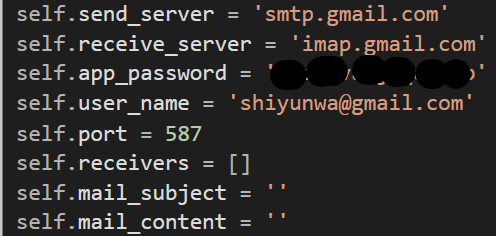

2.Steps to set Gmail:
   * Open Gmail, click `see all settings`.
   * Choose `Accounts and Import` on the toolbar, click `Change password recovery options`.
   * Turn `2-Step verification` on.
   * Then click `App password created`, choose application or device, and **REMEMBER AND RECORD THE PASSWORD**. It will appear and be visible only once (but you can try to create many times)!
   * Now, choose `Forwarding and POP/IMAP` on the toolbar. Click `enable POP for all mail`, and `Enable IMAP`.
   * Last but not least, please `Save Changes`!


3.The folder path
   
   Since this project was developed via the VS 2019 IDE on my laptop, and I put my script file and other functions and class files in different folders separately to meet the requirement of the structure design in this course. Hence, I used the absolute path of the function file to import them in the script file (and directly imported the functions and class into files in the module folder because they are in the same directory). Moreover, other users should replace the absolute path of the script file to run this project on a different computer. The corresponding codes are illustrated as below:
   
   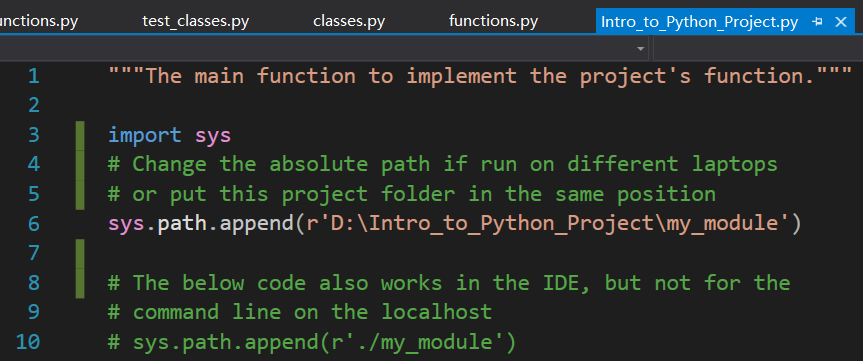
   

   References:  
   [1] https://blog.csdn.net/yuting209/article/details/105424833/?ops_request_misc=&request_id=&biz_id=102&utm_term=python%20smtp&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduweb~default-5-105424833.first_rank_v2_pc_rank_v29&spm=1018.2226.3001.4187
   
   [2] https://realpython.com/python-send-email/
   
   [3] https://www.thepythoncode.com/article/reading-emails-in-python

## Algorithm

 In this project, I adopted the Ceasar cipher algorithm to implement encryption. I chose to denote letters via their Unicode code point rather than using a string or list to store 26 letters and the index to access them. 

 No matter what code point each letter exactly represents, there are always 26 uppercases and 26 lowercases. Thus, to guarantee these two groups of letters merely loop in their group, we can apply modular arithmetic to calculate the shift, which is the essence and charm of the Ceasar cipher algorithm.

 The crucial steps of this algorithm are as follows (take encoding as an example):

   - Direction: right shift (default)
      * Loop each character in the `input_string`, converting `char`s into `code_point`s first.
      * If `char` is a letter (take lowercase as an example), using the algorithm:

      `output_string += chr( (code_point + offset_num - ord('a')) % 26 + ord('a'))`

       `code_point` subtracts `ord(a)`, i.e., the initial letter's code point, obtaining the letter's relative order in the alphabet. Then plus `offset_num`. Adding the `offset_num` will cause overflow, so we have to modulus 26 to guarantee the letter is still in the alphabet. Now, the result we have is a relative letter order in the alphabet. Thus, add the `ord('a')` back and get the final Unicode code point of the shifted letter. Ultimately, convert the code point back to character and concatenate with the `output_string`.
      * Else, `char` is other characters: directly add the `offset_num` to its `code_point`, then convert the code point back to character and concatenate with the `output_string`.


   - Direction: left shift
      * One of the different parts is the formula:

      `output_string += chr( (code_point - offset_num - ord('a') + 26) % 26 + ord('a'))`

       Since we want to shift characters left, `offset_num` should be subtracted. Under this condition, the overflow will be different from the above one — it is negative. Hence, we add 26 to the negative number to make it back to the tail of the alphabet.    

      * The other is if `char` is other characters: directly subtract the `offset_num` from its `code_point`.

The above we discussed is the encoding situation. The exciting thing here is that situations are all reversed in decoding. Precisely, the default direction is left. If the direction is left, we use the left-encoding logic to decode. In contrast, if the direction is right, we use right-encoding logic to decode.

The complete encrypted function codes are shown as below:

In [3]:
# Encode function block

def encode_email(input_string, offset_num, direction = 'right'):
    """Encode the input email in terms of Caesar cipher algorithm.

    Notes
    -----
    If input 'no', then the input information will not be encoded.

    Else, encode the `input_string` according to particular offset
    and shift direction. For letters, using the Caesar cipher algorithm;
    for other characters, simply shift based on the code point.

    Parameters
    ----------
    input_string : str
        The string wanted to be encoded.
    offset_num : int
        The number that each character in the string to shift.
    direction : str, optional
        The direction that characters will shift. default = 'right'

    Returns
    -------
    output_string : str
        The encoded or not encoded string we got.
    """

    output_string = ''
    # Choose to encode or not
    determine = input('Encode this or not? Enter yes or no: ')
    print()

    if determine == 'no':
        output_string = input_string

    elif determine == 'yes':
        # Right shift
        if direction == 'right':
            for char in input_string:
                code_point = ord(char)
                # Lowercase letters
                if ord('a') <= code_point <= ord('z'):
                    output_string += chr( (code_point + offset_num - ord('a')) % 26 + ord('a'))
                # Uppercase letters
                # Z + 1 -> A
                # (90 + 1 - 65) % 26 + 65 = 0 + 65
                elif ord('A') <= code_point <= ord('Z'):
                    output_string += chr( (code_point + offset_num - ord('A')) % 26 + ord('A'))
                # Other characters
                else:
                    output_string += chr(code_point + offset_num)
        # Left shift
        elif direction == 'left':
            for char in input_string:
                code_point = ord(char)
                if ord('a') <= code_point <= ord('z'):
                    # A - 1 -> Z
                    # (65 - 1 - 65 + 26) % 26 + 65 = 25 + 65
                    # B - 1 -> A
                    # (66 - 1 - 65 + 26) % 26 + 65 =  0 + 65
                    output_string += chr( (code_point - offset_num - ord('a') + 26) % 26 + ord('a'))
                elif ord('A') <= code_point <= ord('Z'):
                    output_string += chr( (code_point - offset_num - ord('A') + 26) % 26 + ord('A'))
                else:
                    output_string += chr(code_point - offset_num)

    return output_string

In [1]:
# Decode function block

def decode_email(input_string, offset_num, direction = 'left'):
    """Decode the input email in terms of Caesar cipher algorithm.

    Notes
    -----
    If input 'no', then the input information will not be decoded.

    Else, decode the `input_string` according to particular offset
    and shift direction. For letters, using the Caesar cipher algorithm;
    for other characters, simply shift based on the code point.

    Parameters
    ----------
    input_string : str
        The string wanted to be decoded.
    offset_num : int
        The number that each character in the string to shift.
    direction : str, optional
        The direction that characters will shift. default = 'left'

    Returns
    -------
    output_string : str
        The decoded or not decoded string we got.
    """

    output_string = ''
    # Choose to decode or not
    determine = input('Decode this or not? Enter yes or no: ')

    if determine == 'no':
        output_string = input_string

    elif determine == 'yes':
        # Left shift
        if direction == 'left':
            for char in input_string:
                code_point = ord(char)
                if ord('a') <= code_point <= ord('z'):
                    # A - 1 -> Z
                    # (65 - 1 - 65 + 26) % 26 + 65 = 25 + 65
                    # B - 1 -> A
                    # (66 - 1 - 65 + 26) % 26 + 65 =  0 + 65
                    output_string += chr( (code_point - offset_num - ord('a') + 26) % 26 + ord('a'))
                elif ord('A') <= code_point <= ord('Z'):
                    output_string += chr( (code_point - offset_num - ord('A') + 26) % 26 + ord('A'))
                else:
                    output_string += chr(code_point - offset_num)
        # Right shift
        elif direction == 'right':
            for char in input_string:
                code_point = ord(char)
                # Lowercase letters
                if ord('a') <= code_point <= ord('z'):
                    output_string += chr( (code_point + offset_num - ord('a')) % 26 + ord('a'))
                # Uppercase letters
                # Z + 1 -> A
                # (90 + 1 - 65) % 26 + 65 = 0 + 65
                elif ord('A') <= code_point <= ord('Z'):
                    output_string += chr( (code_point + offset_num - ord('A')) % 26 + ord('A'))
                # Other characters
                else:
                    output_string += chr(code_point + offset_num)

    return output_string


## Challenges

1.When I commenced this project, the first obstacle was settings about the email's server. Since creating an application password needs us to use the registered phone number to receive the verification code. However, two emails that I am familiar with were registered by my domestic phone number, and I cannot use them in America now. Thus, I attempted to use Gmail in this project. Then another barrier appeared — Gmail places lots of emphasis on security, so I could not directly access its server. After searching several online sources, I learned that we had to first turn on the 2-Step verification and then create an application password, as mentioned in the above **`Nota bene`** subsection.


2.Another question was in the test_functions.py file when I attempted to test the encryption functions. I used the input() function to prompt users to select the encryption or not to enrich the interactive experience. However, I could not use the pytest in the command line to test such functions. After searching for solutions online, I found that I must use the syntax, `pytest test_functions.py --capture=no`, such that both prompts and inputs would regularly work in the command line and then pass the test. In addition, we always have to select `yes` in the pytest as I asserted the returns to be specifically modified answers with diverse parameters.
   
   I know that putting them out of the function will simplify this function itself and avoid such issues when testing. Nevertheless, it would also increase the frequency of calling these input prompts, thus complexing the entire project. That is not worth it.
   
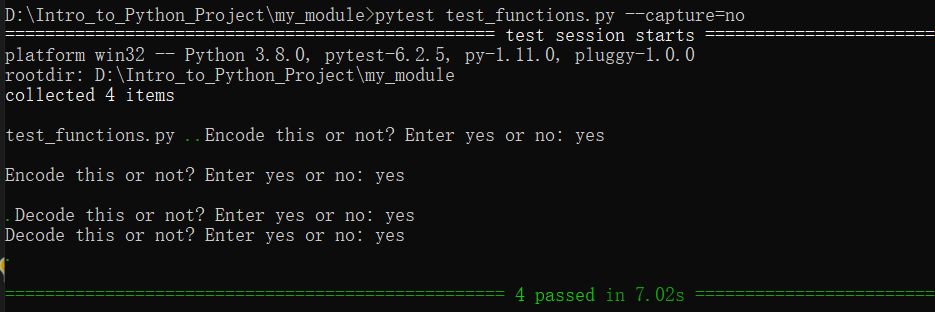   

## Future Work 

1.As mentioned above, considering the access and security settings towards different email servers, it is kind of tricky to log in to various email servers via arbitrary usernames and application passwords. Specifically, just imagine, we have to recognize and segment each part of the input email string, match its domain, get access to its server, and finally set about checking its username and password. Besides, how to check the "correctness" of the username and password? Using a database to pre-store all the information? I do not think it is an accessible and good idea... Therefore, **letting everyone directly use their account to log in, including username and application password,** is one of the further tasks of this project.


2.Currently, I assign distinct integers to parameters in the main function when I try to call the encode and decode function. That is to say, users are merely allowed to select encode or decode or not but cannot choose the specific parameters, such as offset number, shift direction, receiving number. The reason leading to this issue is similar to the above section. Assuming we want to input parameters by ourselves, we have to do it before we call the corresponding function. Thus, this measure would break the encapsulation property of the function. To be more specific, we cannot call it briefly with its function name in other functions or scripts anymore since before calling it, we have to use a block to input its parameters. Hence, **encoding and decoding the message more flexibly in an interactive way** is another future work of this project.


3.In this project, although the source that I refer to contains different branches when sending and receiving an email, such as receiving an email in HTML format, sending and receiving an email with attachments. It is thorny to understand the techniques and implement them. Moreover, I think it is unnecessary in this project, and it would not be very meaningful if I directly copied and pasted the codes. However, it is still a sparkling point worth further exploration in the future — implement more email functions, such as sending and receiving attachments. Besides, why not try to encode and decode an image or an attachment file? I suppose we can use data processing techniques, converting them into the array or other more standard and numeric data types, and conducting the encryption. **For example, images are generally represented by an eigenvector, consisting of its RGB values. In other words, an image is typically vectorized to process, and the domain of each element is in the interval [0, 255]. In comparison, when we encoded and decoded the letters in the alphabet, we treated each letter's order number in the interval [0, 25] then the Ceasar cipher algorithm was adopted. Now, things are getting interesting. Why not use the Ceasar cipher algorithm to encrypt the RGB values of an image? Then each value will shift in a loop between 0 and 255.** Moreover, trying to enrich the diversity of encryption algorithms is also significant.


#### Extra Credit

In the last section, I am going to list some bright spots of my project.

1.Interaction
   - **Prompts:**
     I designed multiple and clear prompts to guide a user to input information by using conditionals structure. 
   - **Selectable encoding and decoding operation:**
     I called the encode function in the send email function and the decode function in the receive email function. Each time the program requires the user to enter `yes` or `no` to select encryption. Additionally, since we do not know how many numbers each character in the message has been shifted, I used a for loop to try several times to decode the encrypted email. Moreover, the loop index, i.e., the trying time, is associated with the offset number in the decode function. To be more specific, try the first time, and characters will be shifted by one position; and two on the second try.
  
  
2.Email
   - **Send an email to multiple receivers:**
     In the Class, I defined the `receivers` as an empty list, and then I can use an `append` method to add multiple receivers. Besides, use the `join` method to convert the list into a string to cater to the data type requirement in an email object.
   - **Receive arbitrary number of emails from the user's email:**
     I used a for loop to receive choosable-number emails from the index box or different positions of the user's email.
   - **Receive plain text content and bytes type email:**
     Plain text content and bytes type email are all considered and can be parsed. 


3.Algorithm
   - **Process letters and other characters separately:**
     I processed letters and other characters in different ways in the encryption section, such as numbers, punctuations, and special characters. For letters, I used the Ceasar cipher algorithm. For others, I directly calculated the shift based on their Unicode code point.
   - **Ceasar cipher algorithm:**
     Although it is a traditional cipher algorithm, it is pretty classic and typical. Instead of using a string or list to store 26 letters and using the index to access them, I chose to represent them through their Unicode code point. Afterward, I introduced the Ceasar cipher algorithm to calculate the shift. It is much more fantastic than simply using a clumsy string or list.


4.Detail
   - **Trim the input email address, whitespace allowed:**
     In the `user_check` Class method, I used the `replace` method to trim all the whitespace in the input string. So possible whitespace typo is allowed when inputting all kinds of email addresses. 
   - **Use a regular expression to detemine the email format:**
     I used a regular expression to determine the standard format of an email. Moreover, the `match` method was adopted from the `re` library. `match(r'^[a-zA-Z0-9_-]+@[a-zA-Z0-9]+(\.[a-zA-Z]+)+$', input_string) == None`.
   - **Use the title() method of a string to convert the input subject into a title version:**
     After inputting the subject of an email, I used the `title` method to convert the initial letter of each word in the subject string. Then when receiving the email, the subject we see will be in a title format.  
  